<a href="https://colab.research.google.com/github/swarnava-96/Time-Series/blob/main/fbprophet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting using Facebook Prophet (fbprophet)**

## Importing the necessary libraries and Loading the dataset

In [6]:
cd  "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


In [7]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Reading the dataset and seeing the top 5 rows
df = pd.read_csv("airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [9]:
# Checking the last 5 data
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


## Data Preprocessing

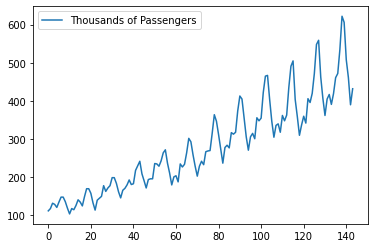

In [10]:
# Lets plot the column values

df.plot()

In [11]:
# Renaming the Month column to "ds" and Thousands of passenger to "y"

df.columns = ["ds", "y"]
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [12]:
# Dropping the last row as it is a bad data 

df.drop(144, inplace = True, axis =0)

In [13]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [14]:
# Lets check the info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      144 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [15]:
# We have to change the ds to datetime

df["ds"] = pd.to_datetime(df["ds"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


## Initializing and Fitting the model

In [17]:
# importing Prophet

from fbprophet import Prophet

In [18]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [20]:
# Lets initialize and fit the model

model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

## Forecasting and Prediction

In [22]:
# Creating future dates of 365 days

future_dates = model.make_future_dataframe(periods = 365)

In [23]:
prediction = model.predict(future_dates)

In [24]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,56.058859,113.603856,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,48.458590,104.840013,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,82.295421,139.212146,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,78.073656,135.471672,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,82.928937,139.831458,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,520.639276,470.964247,526.625850,520.053355,521.182264,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,0.0,0.0,0.0,498.285073
505,1961-11-28,520.739726,469.486023,526.863995,520.150694,521.286169,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,0.0,0.0,0.0,496.755524
506,1961-11-29,520.840176,463.954340,523.104011,520.248802,521.390198,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,0.0,0.0,0.0,494.588071
507,1961-11-30,520.940625,465.325436,520.436479,520.347020,521.496449,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,0.0,0.0,0.0,491.826895


In [25]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.639276,470.964247,526.625850,520.053355,521.182264,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,0.0,0.0,0.0,498.285073
505,1961-11-28,520.739726,469.486023,526.863995,520.150694,521.286169,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,0.0,0.0,0.0,496.755524
506,1961-11-29,520.840176,463.954340,523.104011,520.248802,521.390198,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,0.0,0.0,0.0,494.588071
507,1961-11-30,520.940625,465.325436,520.436479,520.347020,521.496449,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,0.0,0.0,0.0,491.826895
508,1961-12-01,521.041075,458.278345,516.856897,520.445337,521.598542,-32.509534,-32.509534,-32.509534,-32.509534,-32.509534,-32.509534,0.0,0.0,0.0,488.531541


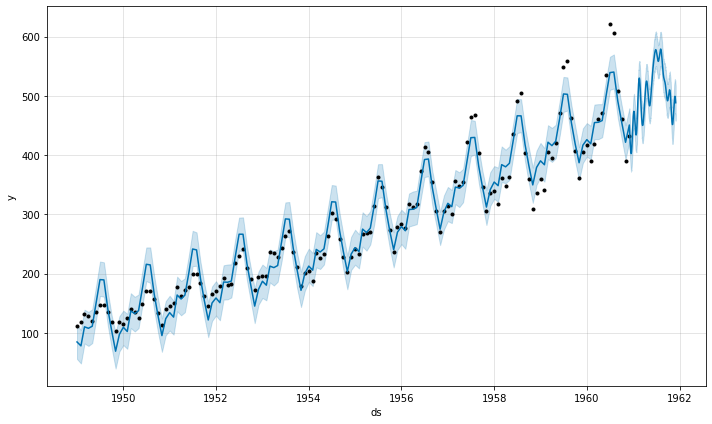

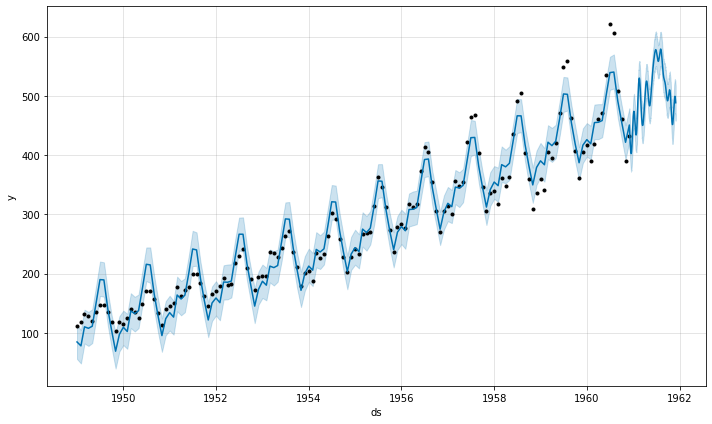

In [26]:
# Plottig the predicted forecast

model.plot(prediction)

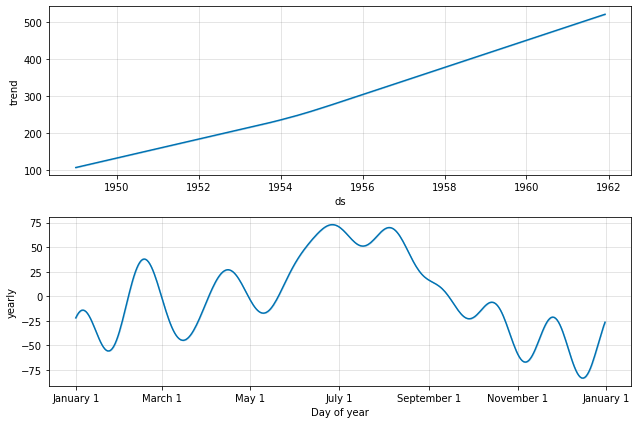

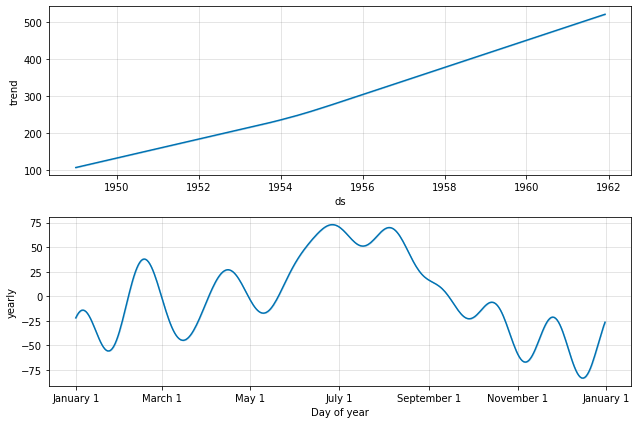

In [27]:
# Lets visualize each componenets

model.plot_components(prediction)

## Cross Validation

In [28]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = "730 days",period = "180 days",  horizon = "365 days")

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [29]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.797416,158.207412,150.0,1951-01-18
1,1951-03-01,171.224502,170.608308,171.824170,178.0,1951-01-18
2,1951-04-01,159.628157,158.376862,160.924608,163.0,1951-01-18
3,1951-05-01,145.666500,143.703439,147.769373,172.0,1951-01-18
4,1951-06-01,180.679910,177.828201,183.766165,178.0,1951-01-18


In [30]:
# Performance metrics

from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


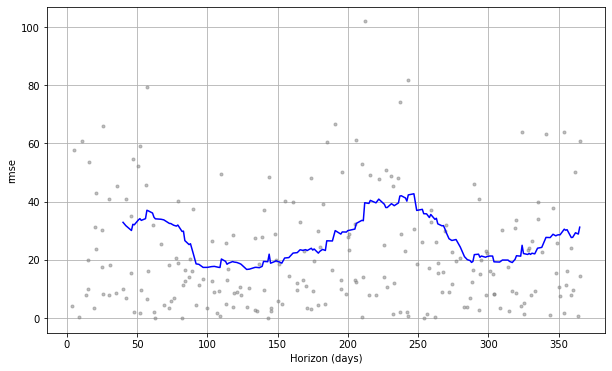

In [31]:
# Lets plot the performance metrics

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric ="rmse")

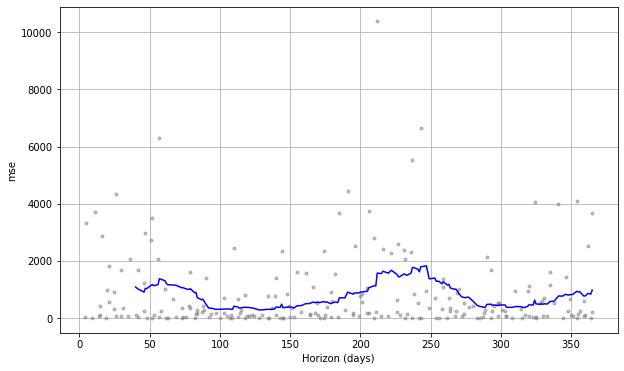

In [32]:
fig = plot_cross_validation_metric(df_cv, metric ="mse")

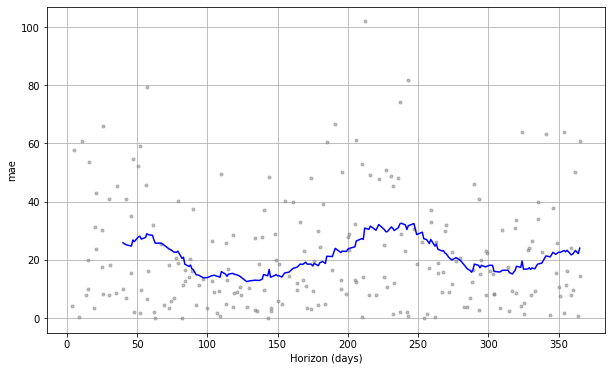

In [33]:
fig = plot_cross_validation_metric(df_cv, metric ="mae")

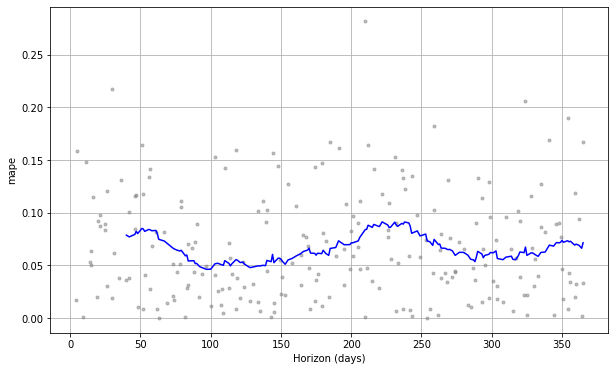

In [34]:
fig = plot_cross_validation_metric(df_cv, metric ="mape")

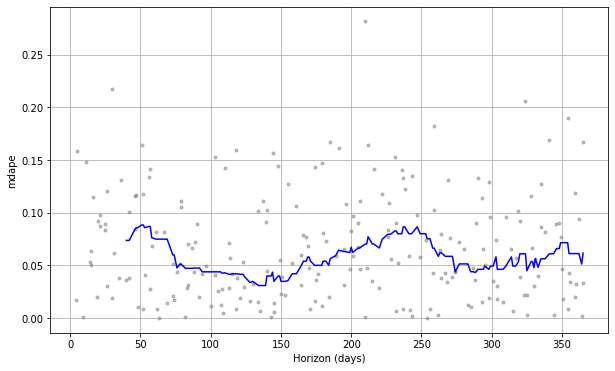

In [35]:
fig = plot_cross_validation_metric(df_cv, metric ="mdape")

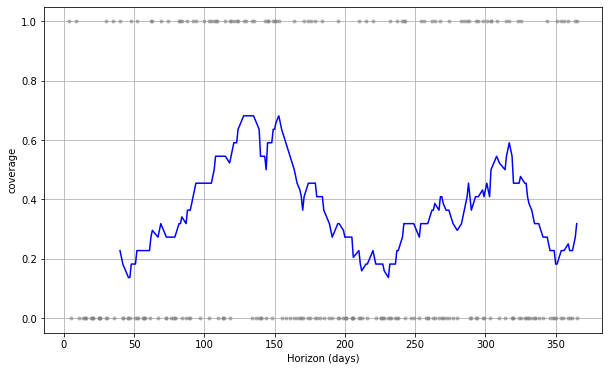

In [36]:
fig = plot_cross_validation_metric(df_cv, metric ="coverage")